# Tutorial: Surface plot with BrainSpace  
__Content creator:__ Raul R Cruces  
__pod name__: Truthful-inchworms 149

First we load the necessary libraries

In [2]:
#@title Import functions
%matplotlib inline  
#!pip install brainspace --quiet
#!pip install panel --quiet
import ipywidgets as widgets  # interactive display
my_layout = widgets.Layout()
import numpy as np
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres, plot_surf
from brainspace.utils.parcellation import map_to_labels
import panel as pn
pn.extension('vtk')
import os # OS to handle paths
import pandas as pd # pandas for data framse
import matplotlib.pyplot as plt # For changing the color maps
from matplotlib import cm # cm=colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from hcp_regions import HCPRegions
import ipywidgets as widgets       # interactive display


## Glasser parcellation: Region Names and Index   
Images taken from:  
> Glasser, Matthew F., et al. "A multi-modal parcellation of human cerebral cortex." [Nature 536.7615 (2016): 171-178.](https://doi.org/10.1073/pnas.1902299116)
<img src="balsa.wustl-1.png" width=75% height=75% /> <img src="balsa.wustl-2.png" width=75% height=75% />

In [3]:
# Region names are entered as strings indexes as int
hcpRegions = HCPRegions()
hcpRegions.what_is('4', verbose=True)
hcpRegions.table

Name of ROI 4
Parcel Index: 8
Area description: Primary Motor Cortex
Other names: BA4, 4a, 4p, M1, PMC, F1
New?: No
Sections: 6,7,8,9
Key studies: Fischl et al 2008, Geyer et al 1996


ParcelIndex AreaName                   AreaDescription   New  \
0              1       V1             Primary Visual Cortex    No   
1              2      MST     Medial Superior Temporal Area    No   
2              3       V6                 Sixth Visual Area    No   
3              4       V2                Second Visual Area    No   
4              5       V3                 Third Visual Area    No   
5              6       V4                Fourth Visual Area    No   
6              7       V8                Eighth Visual Area    No   
7              8        4              Primary Motor Cortex    No   
8              9       3b            Primary Sensory Cortex    No   
9             10      FEF                Frontal Eye Fields    No   
10            11      PEF                Premotor Eye Field    No   
11            12      55b                          Area 55b    No   
12            13      V3A                          Area V3A    No   
13            14      RSC             RetroSplenial Complex    No   
14            15     POS2   Parieto-Occipital Sulcus Area 2  Yes*   
15            16       V7               Seventh Visual Area    No   
16            17     IPS1       IntraParietal Sulcus Area 1    No   
17            18      FFC             Fusiform Face Complex    No   
18            19      V3B                          Area V3B    No   
19            20      LO1          Area Lateral Occipital 1    No   
20            21      LO2          Area Lateral Occipital 2    No   
21            22      PIT  Posterior InferoTemporal Complex    No   
22            23       MT              Middle Temporal Area    No   
23            24       A1           Primary Auditory Cortex    No   
24            25      PSL         PeriSylvian Language Area   Yes   
25            26      SFL    Superior Frontal Language Area   Yes   
26            27      PCV             PreCuneus Visual Area    No   
27            28      STV     Superior Temporal Visual Area   Yes   
28            29      7Pm                    Medial Area 7P   Yes   
29            30       7m                           Area 7m    No   
..           ...      ...                               ...   ...   
150          151      PGs                          Area PGs    No   
151          152      V6A                          Area V6A    No   
152          153     VMV1        VentroMedial Visual Area 1  Yes*   
153          154     VMV3        VentroMedial Visual Area 3  Yes*   
154          155     PHA2            ParaHippocampal Area 2   Yes   
155          156      V4t                          Area V4t    No   
156          157      FST                          Area FST    No   
157          158     V3CD                         Area V3CD   Yes   
158          159      LO3          Area Lateral Occipital 3   Yes   
159          160     VMV2        VentroMedial Visual Area 2  Yes*   
160          161     31pd                         Area 31pd  Yes*   
161          162      31a                          Area 31a  Yes*   
162          163      VVC            Ventral Visual Complex  Yes*   
163          164       25                           Area 25    No   
164          165      s32                          Area s32    No   
165          166     pOFC             posterior OFC Complex  Yes*   
166          167     PoI1          Area Posterior Insular 1  Yes*   
167          168       Ig          Insular Granular Complex  Yes*   
168          169     FOP5          Area Frontal Opercular 5   Yes   
169          170     p10p                Area posterior 10p  Yes*   
170          171     p47r                Area posterior 47r  Yes*   
171          172      TGv                   Area TG Ventral  Yes*   
172          173    MBelt               Medial Belt Complex  Yes*   
173          174    LBelt              Lateral Belt Complex  Yes*   
174          175       A4                Auditory 4 Complex  Yes*   
175          176    STSva                Area STSv anterior   Yes   
176

### 1. Load the Glasser annotation file and conte69 surface  
> A. The *surfaces* are a BSPolyData object wrapped on the BrainSpace [VTK interface](https://vtk.org). For more methods of a **BSPolyData** check this [brainspace.vtk_interface.wrappers.data_object.BSPolyData](https://brainspace.readthedocs.io/en/latest/generated/brainspace.vtk_interface.wrappers.data_object.BSPolyData.html). For this example we use the *conte 69* symmetric surface ([Van EWssen et al.; Cereb Cortex. 2012](https://dx.doi.org/10.1093%2Fcercor%2Fbhr291)).  
> B. The annotation file with the ROI's id is a np.array of length of the number of ROI's. The 0 value usually represent the medial wall.

In [4]:
# First load the Glasser annotation file
Glasser = np.loadtxt('glasser_360_conte69.csv', dtype=np.int)

# and load the conte69 surfaces
surf_lh, surf_rh = load_conte69()

# Chek the number of vertices of conte69
print('Number of vertices:',surf_lh.n_points + surf_rh.n_points)

# Print the number of ROI in Glasser
print('Number of ROI:', len(np.unique(Glasser)))


Number of vertices: 64984
Number of ROI: 361


/home/davide/anaconda3/lib/python3.7/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


### 2. Plot the labels over the surface

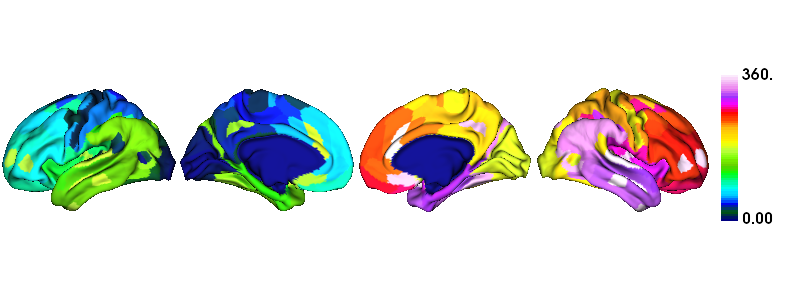

In [5]:
plot_hemispheres(surf_lh, surf_rh, array_name=Glasser, size=(800, 300),
                 cmap='gist_ncar', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

## 3. Mask of the medial wall

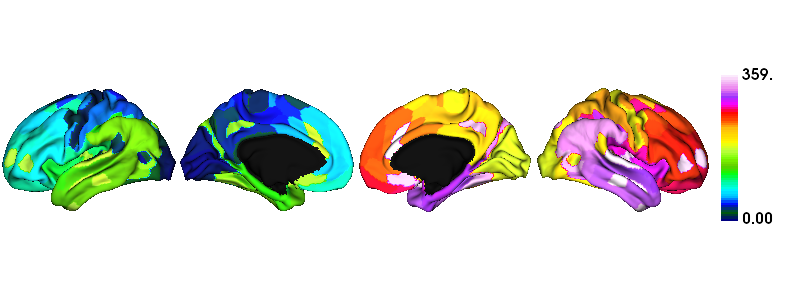

In [6]:
# Mask the 0-value ROI of the medial wall
mask = Glasser != 0

# Create an array of the ROI unique values (Nrois x 1, float)
GlasserROIs = np.asarray(np.unique(Glasser), dtype=float)

# Map ROI values to vertices indexes (Nvertices x 1)
Glasser_masked = map_to_labels(GlasserROIs, Glasser, mask=mask, fill=np.nan)

# Plot ROIs with masked medial wall
plot_hemispheres(surf_lh, surf_rh, array_name=Glasser_masked, size=(800, 300), nan_color=(0, 0, 0, 1),
                 cmap='gist_ncar', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

## 4. ROI of Primary Motor Cortex for QC
> Area description: **Primary Motor Cortex (PMC)**  
Name of ROI: **4**  
Parcel Index: Right=**8**, Left=**8+180**  


/home/davide/anaconda3/lib/python3.7/site-packages/brainspace/vtk_interface/wrappers/data_object.py:166: UserWarning: Input array is boolean. Casting to uint8.
  warnings.warn('Input array is boolean. Casting to uint8.')


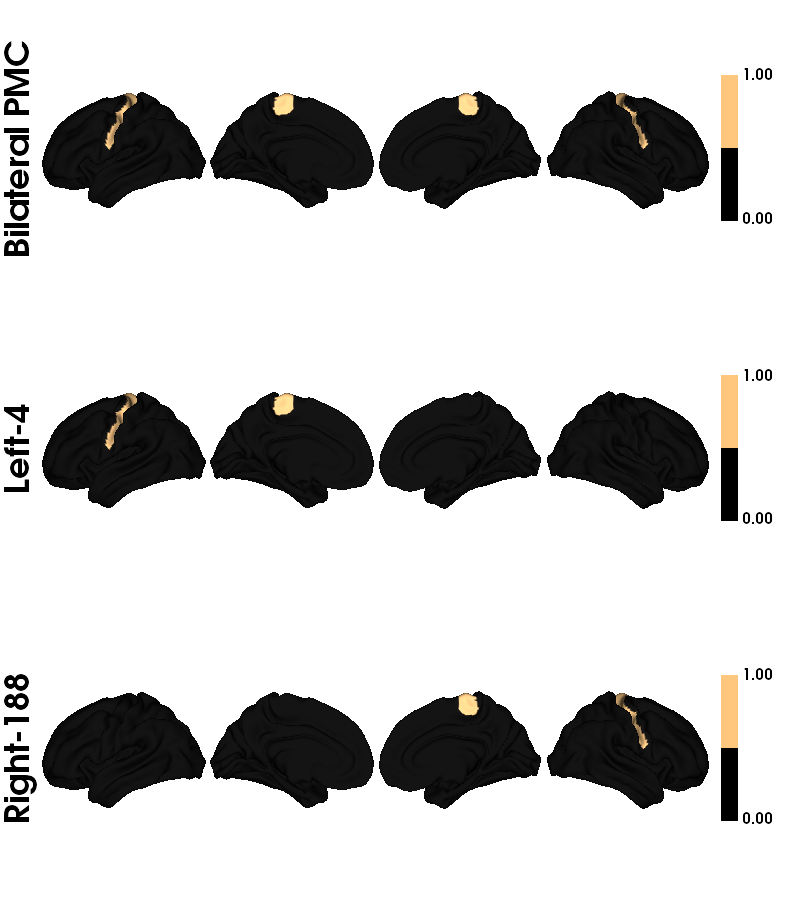

In [7]:
# Plot of an array of surfaces
ROI = 8  # ROI that we want to plot
PMC_labels = ['Bilateral PMC', 'Left-4', 'Right-188'] # Labels for each surface plot

# Create an list with the arrays of surfaces
PMCrois = [None] * 3

# Use conditional operator to find the ROI of interest
PMCrois[0]  = np.where((Glasser == ROI) | (Glasser == ROI+180), 1, 0)
PMCrois[1] = Glasser == ROI
PMCrois[2] = Glasser == ROI+180 # ROI+180 is the right ROI

# Plot of the array
plot_hemispheres(surf_lh, surf_rh, array_name=PMCrois, size=(800, 300*3),label_text=PMC_labels,
                 cmap='copper', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

## Function to plot unique ROIs

In [13]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def refresh(ROI=3):
    ROI = ROI  # ROI that we want to plot
    PMC_labels = ['Bilateral PMC', 'Left-4', 'Right-188'] # Labels for each surface plot

    # Create an list with the arrays of surfaces
    PMCrois = [None] * 3

    # Use conditional operator to find the ROI of interest
    PMCrois[0]  = np.where((Glasser == ROI) | (Glasser == ROI+180), 1, 0)
    PMCrois[1] = Glasser == ROI
    PMCrois[2] = Glasser == ROI+180 # ROI+180 is the right ROI

    #Plot of the array
    plot_hemispheres(surf_lh, surf_rh, array_name=PMCrois, size=(800, 300*3),label_text=PMC_labels,
                    cmap='copper', zoom=1.25, color_bar=True, embed_nb=False, interactive=False)
    

style = {'description_width': 'initial'}

_ = widgets.interact(refresh, 
    ROI=widgets.FloatSlider(value=3, min=1, max=np.unique(Glasser).shape[0] - 1, 
                            step=1, description="ROI", style=style),
)  




interactive(children=(FloatSlider(value=3.0, description='ROI', max=360.0, min=1.0, step=1.0, style=SliderStyl…

## Plot a vector of values to the surface

In [48]:
# Create an array with random values from -1 to 1
rho_rand = np.concatenate((0, np.random.uniform(-1,1,[360,1])), axis=None)

# Map the vector values to the vertices indices
rho_ver = map_to_labels(rho_rand, Glasser, mask=mask,fill=np.nan)

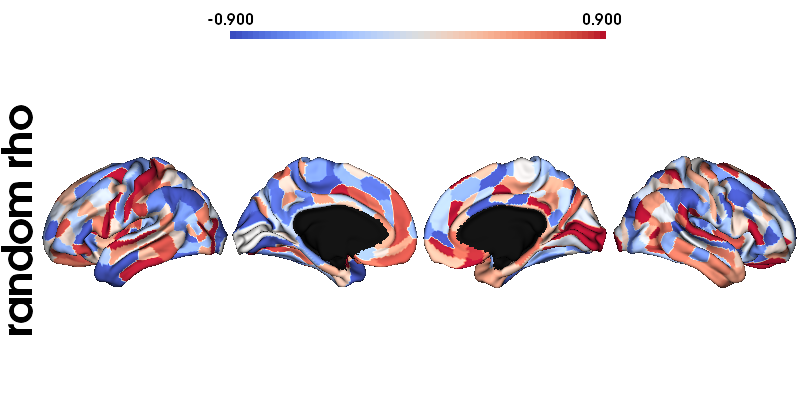

In [49]:
# Plot 
# Label text for column/row. Possible keys are {'left', 'right','top', 'bottom'}
# label_text : dict[str, array-like], optional
#         Label text for column/row. Possible keys are {'left', 'right',
#         'top', 'bottom'}, which indicate the location. Default is None.
Lim = (-0.9, 0.9)
plot_hemispheres(surf_lh, surf_rh, 
                 array_name=rho_ver, 
                 size=(800, 400), 
                 label_text={'left':['random rho']}, 
                 color_bar='top',
                 cmap='coolwarm', 
                 zoom=1.25, 
                 embed_nb=True, 
                 interactive=False, 
                 share='both',
                 color_range=Lim
                )

## Widget: Rho threshold

## Customize a colormap

In [318]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black
newcmp = ListedColormap(newcolors)
newcolors[0:3, :]

array([[0.      , 0.      , 0.      , 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ]])

# More settings for surface plotting with **plot_surf**
### Colorbar position. 
top, left, right, bottom


In [317]:
# Position of the color bar

### Modifiying the layout (2 x 2)... under development

In [316]:
# Ditionary with the surfaces
# surfs = {'lh': surf_lh, 'rh': surf_rh}
# # Plot Layout (shape = (n_rows, n_cols))
# layout = np.array([['lh', 'lh'], ['rh', 'rh']])
# view = ['lateral', 'medial', 'lateral', 'medial']
# kwds = {'share': 'r'}

In [319]:
# plot_surf(surfs, layout, array_name=rho_ver, view=view, color_bar='bottom',
#               color_range='Sym', share=False, label_text='rho', cmap='twilight',
#               nan_color=(0, 0, 0, 1), zoom=1, background=(1, 1, 1),
#               size=(400, 400), embed_nb=True, interactive=False, scale=(1, 1),
#               transparent_bg=True, screenshot=False, filename=None,
#               return_plotter=True)